# What is Machine Learning?

Machine learning is the science (and art) of programming computers so they can
learn from data.

**Here is a slightly more general definition:**

**Machine learning** is the field of study that gives computers the ability to learn without being explicitly programmed.
—Arthur Samuel, 1959


**And a more engineering-oriented one:**

A computer program is said to learn from experience E with respect to some task
T and some performance measure P, if its performance on T, as measured by P,
improves with experience E.
—Tom Mitchell, 1997


# Why use Machine Learning?

**Machine learning is great for:**

- Problems for which existing solutions require a lot of fine-tuning or long lists of rules (a machine learning model can often simplify code and perform better than the traditional approach)
- Complex problems for which using a traditional approach yields no good solution (the best machine learning techniques can perhaps find a solution)
- Fluctuating environments (a machine learning system can easily be retrained on
new data, always keeping it up to date)
- Getting insights about complex problems and large amounts of data

# Examples of applications

Let’s look at some concrete examples of machine learning tasks, along with the
techniques that can tackle them:

- Analyzing images of products on a production line to automatically classify them
This is image classification, typically performed using convolutional neural networks (CNNs; see Chapter 14) or sometimes transformers (see Chapter 16).

- Detecting tumors in brain scans
This is semantic image segmentation, where each pixel in the image is classified
(as we want to determine the exact location and shape of tumors), typically using CNNs or transformers.

- Automatically classifying news articles
This is natural language processing (NLP), and more specifically text classification, which can be tackled using recurrent neural networks (RNNs) and CNNs, but transformers work even better (see Chapter 16).

- Automatically flagging offensive comments on discussion forums
This is also text classification, using the same NLP tools.

- Summarizing long documents automatically
This is a branch of NLP called text summarization, again using the same tools.

- Creating a chatbot or a personal assistant
This involves many NLP components, including natural language understanding
(NLU) and question-answering modules.

- Forecasting your company’s revenue next year, based on many performance metrics
This is a regression task (i.e., predicting values) that may be tackled using any regression model, such as a linear regression or polynomial regression model
(see Chapter 4), a regression support vector machine (see Chapter 5), a regression random forest (see Chapter 7), or an artificial neural network (see Chapter 10). If you want to take into account sequences of past performance metrics, you may want to use RNNs, CNNs, or transformers (see Chapters 15 and 16).

- Making your app react to voice commands
This is speech recognition, which requires processing audio samples: since they
are long and complex sequences, they are typically processed using RNNs, CNNs,
or transformers (see Chapters 15 and 16).

- Detecting credit card fraud
This is anomaly detection, which can be tackled using isolation forests, Gaussian mixture models (see Chapter 9), or autoencoders (see Chapter 17).

- Segmenting clients based on their purchases so that you can design a different marketing strategy for each segment
This is clustering, which can be achieved using k-means, DBSCAN, and more
(see Chapter 9).

- Representing a complex, high-dimensional dataset in a clear and insightful diagram
This is data visualization, often involving dimensionality reduction techniques
(see Chapter 8).

- Recommending a product that a client may be interested in, based on past purchases
This is a recommender system. One approach is to feed past purchases (and
other information about the client) to an artificial neural network (see Chapter 10), and get it to output the most likely next purchase. This neural net would typically be trained on past sequences of purchases across all clients.

- Building an intelligent bot for a game
This is often tackled using reinforcement learning (RL; see Chapter 18), which is a branch of machine learning that trains agents (such as bots) to pick the actions that will maximize their rewards over time (e.g., a bot may get a reward every time the player loses some life points), within a given environment (such as the
game). The famous AlphaGo program that beat the world champion at the game
of Go was built using RL.

This list could go on and on, but hopefully it gives you a sense of the incredible
breadth and complexity of the tasks that machine learning can tackle, and the types of
techniques that you would use for each task.


# Types of Machine Learning

- Supervised learning
- Unsupervised learning
- Semi-supervised learning
- Self-supervised learning
- Reinforcement learning



 # Training and running a linear model using Scikit-Learn

## Does money make people happier?
suppose you want to know if money makes people happy, let's use Better Life Index dataset from the OECD’s website and World Bank stats
about gross domestic product (GDP) per capita.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
#downloading and read the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + 'lifesat/lifesat.csv')

In [3]:
#define inputs and labels
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

The double brackets [["GDP per capita (USD)"]] are used to ensure that the result is a 2D array (matrix), which is required by scikit-learn's LinearRegression model.
<br></br>

Here's why:
<br></br>

**Key Explanation:**

Single vs. Double Brackets in Pandas:

df["column"] -> returns a 1D Series.

df[["column"]] -> returns a 2D DataFrame (even with just one column).

<br></br>
**Scikit-Learn Requirement:**

Scikit-learn expects input features (X) to be a 2D array (shape: [n_samples, n_features]), even if there's only one feature.
<br></br>

**.values Conversion:**

lifesat[["GDP per capita (USD)"]].values

converts the DataFrame to a 2D NumPy array (shape: [n_samples, 1]).
<br></br>

Without double brackets, lifesat["GDP per capita (USD)"].values would give a 1D array (shape: [n_samples,]), which would cause an error in scikit-learn.

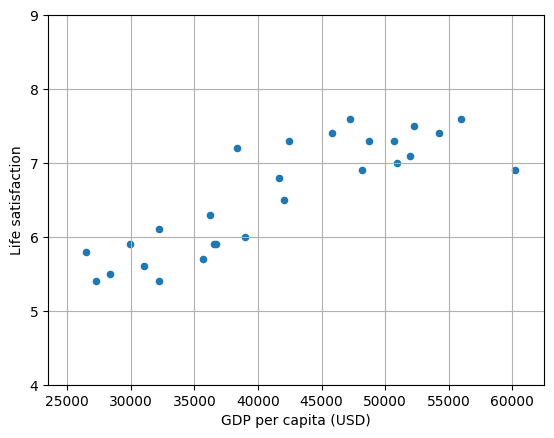

In [4]:
# visualize the data

lifesat.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y='Life satisfaction')

#plt.axis([x_min, x_max, y_min, y_max])
plt.axis([23_500, 62_500, 4, 9])

# Python understands numbers with underscores like 23_500 perfectly.
# The underscores are ignored—they’re just there to make large numbers more readable for humans.
# This feature was introduced in Python 3.6+.

plt.show()

In [5]:
# Selecting a model
model = LinearRegression()

# Training the model
model.fit(X, y)

# Making a prediction for Cyprus
# Cyprus' GDP per capita in 2020 is 37655.2

X_test = [[37_655.2]]

print(model.predict(X_test))

[[6.30165767]]


In [6]:
# Making a prediction for Egypt
# Egypt' GDP per capita in 2024 is 3,541.75

X_test = [[3_541.2]]

print(model.predict(X_test))

[[3.98910382]]


Replacing the linear regression model with k-nearest neighbors
regression in the previous code is as easy as replacing these lines:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

with these two:

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
# Training the model
model.fit(X, y)

# Making a prediction for Cyprus
# Cyprus' GDP per capita in 2020 is 37655.2

X_test = [[37_655.2]]

print(model.predict(X_test))

[[6.33333333]]


In [8]:
# Making a prediction for Egypt
# Egypt' GDP per capita in 2024 is 3,541.75

X_test = [[3_541.2]]

print(model.predict(X_test))

[[5.56666667]]


If all went well, your model will make good predictions. If not, you may need to
use more attributes (employment rate, health, air pollution, etc.), get more or betterquality
training data, or perhaps select a more powerful model (e.g., a polynomial
regression model).

# Main Challenges of Machine Learning
In short, since your main task is to select a model and train it on some data, the two
things that can go wrong are **“bad model”** and **“bad data”**.

## Bad data:

- Insufficient Quantity of Training Data
- Nonrepresentative Training Data:
the set of countries you used earlier for training the linear model was
not perfectly representative; it did not contain any country with a GDP per capita
lower than 23,500 or higher than $62,500.
By using a nonrepresentative training set, you trained a model that is unlikely to
make accurate predictions, especially for very poor and very rich countries.
- Poor-Quality Data: training data is full of errors, outliers, and noise
- Irrelevant Features

## Bad Model:
- Overfitting the Training Data: the model performs well on the training data, but it does not generalize
well.
- Underfitting the Training Data: your
model is too simple to learn the underlying structure of the data.

>You train multiple models with various
hyperparameters on the reduced training set (i.e., the full training set minus the
**validation set**), and you select the model that performs best on the validation set.
After this holdout validation process, you train the best model on the full training set
(including the validation set), and this gives you the final model. Lastly, you evaluate
this final model on the test set to get an estimate of the generalization error.

>Both the validation set and
the test set must be as representative as possible of the data you expect to use in
production

# A cool definition of the model

A model is a simplified representation of the data. The simplifications are meant to
discard the superfluous details that are unlikely to generalize to new instances. When
you select a particular type of model, you are implicitly making assumptions about
the data. For example, if you choose a linear model, you are implicitly assuming that
the data is fundamentally linear and that the distance between the instances and the
straight line is just noise, which can safely be ignored.

# Exercises

1- How would you define machine learning?

>Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed.


2- What is a labeled training set?

>a training set that contains the desired solution


3- What are the two most common supervised tasks?

>Regression & classification

4- Can you name four common unsupervised tasks?

>clustering, visualization, dimensionality reduction, and association rule learning.

5- What type of algorithm would you use to allow a robot to walk in various
unknown terrains?

>Reinforcement learning

6- What type of algorithm would you use to segment your customers into multiple
groups?

>clustering

7- What is an online learning system?
>An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.

8- What is out-of-core learning?
>Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.

9- What type of algorithm relies on a similarity measure to make predictions?
>An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.

10- What is the difference between a model parameter and a model hyperparameter?
>A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).

11- What do model-based algorithms search for? What is the most common strategy
they use to succeed? How do they make predictions?
>Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance's features into the model's prediction function, using the parameter values found by the learning algorithm.

12- Can you name four of the main challenges in machine learning?
> lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.

13- If your model performs great on the training data but generalizes poorly to new
instances, what is happening? Can you name three possible solutions?
> Overfitting the training data. Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.

14- What is a test set, and why would you want to use it?
>A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.

15- What is the purpose of a validation set?
>A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters

16- What is the train-dev set, when do you need it, and how do you use it?
>The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that's held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.

17- What can go wrong if you tune hyperparameters using the test set?
>If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).